In [9]:
import pandas as pd

In [10]:
import numpy as np
import nltk
import scipy
import sklearn

In [11]:
spam_df=pd.read_csv("/content/SMSSpamCollection", sep='\t', header=None, names=['label','message'])

In [12]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
spam_df=spam_df.drop_duplicates()

In [14]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [15]:
import sklearn
sklearn.__version__

'1.2.2'

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam_df["label"]=encoder.fit_transform(spam_df["label"])

In [17]:
spam_df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
spam_df.isnull().sum()

label      0
message    0
dtype: int64

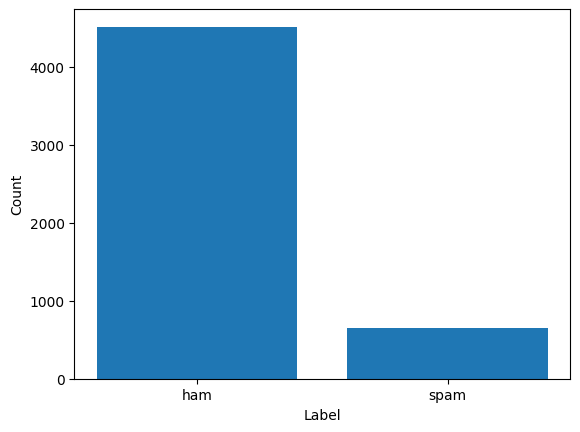

In [19]:
import matplotlib.pyplot as plt
label_counts = spam_df['label'].value_counts()

labels = ['ham', 'spam']  # Assuming 0 is 'ham' and 1 is 'spam'
counts = [label_counts.get(0, 0), label_counts.get(1, 0)]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import string

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
stopwords=nltk.corpus.stopwords.words('english')


In [24]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [25]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
corpus=[]
for i in range(len(spam_df)):
  new_message = spam_df['message'].iloc[i].lower()
  new_message=''.join([char for char in new_message if char not in string.punctuation])
  tokens= word_tokenize(new_message)
  new_tokens=[word for word in tokens if word not in stopwords]
  stemmed_tokens=[stemmer.stem(word) for word in new_tokens]
  final_message=' '.join(stemmed_tokens)
  corpus.append(final_message)
spam_df["new_message"]=corpus

In [27]:
spam_df["new_message"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u £750 pound prize 2 ...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: new_message, Length: 5169, dtype: object

In [28]:
spam_df

,label,message,new_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u u £750 pound prize 2 ...
5568,0,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy someth els ...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
final_X=vectorizer.fit_transform(spam_df.new_message).toarray()
final_X=pd.DataFrame(final_X)



In [30]:
final_X.head()

,0,1,2,3,4,5,6,7,8,9,...,8082,8083,8084,8085,8086,8087,8088,8089,8090,8091
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_X,spam_df.label,test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)


RandomForestClassifier()

In [33]:
y_pred=classifier.predict(X_test)

In [34]:
print(y_pred)
print(y_test.to_numpy())

[0 1 0 ... 0 0 0]
[1 1 0 ... 0 0 0]


In [35]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.97678916827853

In [36]:
from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier()
param_grid= {
    'n_estimators':[3,10,30],
    'max_depth':[30,60,90,None]
}
grid_search=GridSearchCV(clf,param_grid,cv=3,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .......................max_depth=30, n_estimators=3; total time=   0.6s
[CV] END .......................max_depth=30, n_estimators=3; total time=   0.5s
[CV] END .......................max_depth=30, n_estimators=3; total time=   0.4s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.8s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.8s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.8s
[CV] END ......................max_depth=30, n_estimators=30; total time=   2.2s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.8s
[CV] END ......................max_depth=30, n_estimators=30; total time=   1.9s
[CV] END .......................max_depth=60, n_estimators=3; total time=   0.6s
[CV] END .......................max_depth=60, n_estimators=3; total time=   0.8s
[CV] END .......................max_depth=60, n_

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 60, 90, None],
                         'n_estimators': [3, 10, 30]},
             verbose=2)

In [37]:
grid_search.best_params_

{'max_depth': 90, 'n_estimators': 30}

In [38]:
final_model= grid_search.best_estimator_

In [39]:
y_pred_new = final_model.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred_new))

0.9748549323017408


In [41]:
import pickle

In [42]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(final_model,open('spam_model.pkl','wb'))